# demo bedcmm pattern method

## Pattern exctarction demo
### virtual ecg data

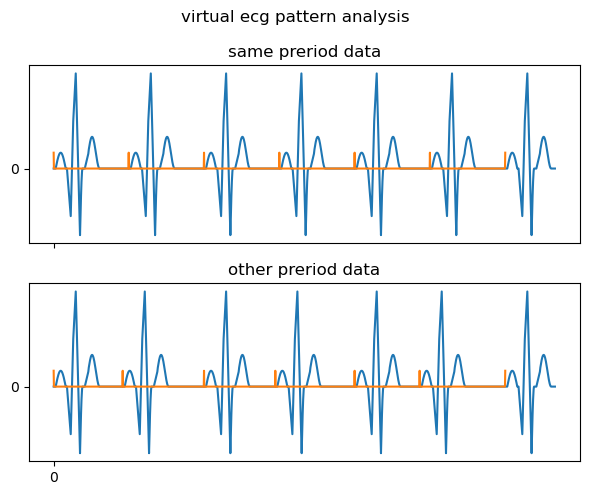

In [1]:
from bedcmm.pattern import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

ecg_base_data = np.array(pd.read_csv("./sample_data/ecg_base_data.csv"))[:,0]
ecg_same_preiod = np.array(pd.read_csv("./sample_data/ecg_same_preiod.csv"))[:,0]
ecg_other_preiod = np.array(pd.read_csv("./sample_data/ecg_other_preiod.csv"))[:,0]

ecg_same_pattern_exctact = pattern_1d(ecg_same_preiod,ecg_base_data)
ecg_other_pattern_exctact = pattern_1d(ecg_other_preiod,ecg_base_data)

fig, ax = plt.subplots(2, 1, sharex="all", figsize=(6, 5),tight_layout=True)
fig.suptitle("virtual ecg pattern analysis")
ax[0].set_title('same preriod data')
ax[0].plot(ecg_same_preiod)
ax[0].plot(ecg_same_pattern_exctact)
ax[0].set_xticks([0])
ax[0].set_yticks([0])
ax[1].set_title('other preriod data')
ax[1].plot(ecg_other_preiod)
ax[1].plot(ecg_other_pattern_exctact)
ax[1].set_xticks([0])
ax[1].set_yticks([0])


## Periodicity analysis and Continuity analysis
### covid-19 data

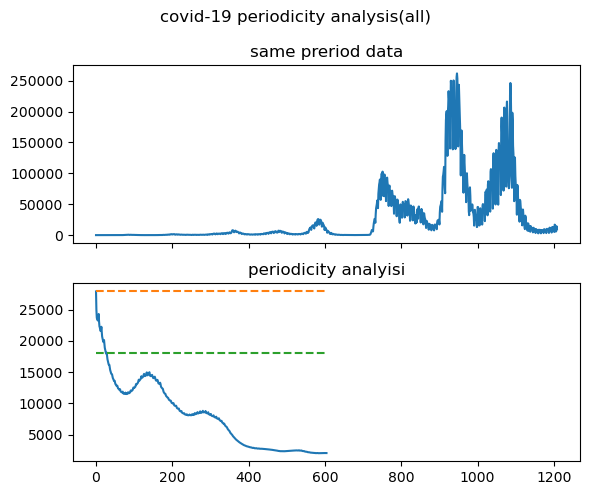

In [2]:
from bedcmm.pattern import *
import pandas as pd
import matplotlib.pyplot as plt

covid_19_data_df = pd.read_csv("./sample_data/covid-19/newly_confirmed_cases_daily.csv")[['Date','ALL']]
covid_19_data = np.array(covid_19_data_df['ALL'].values,dtype=np.float64)
covid_19_period = periodicity_1d(covid_19_data)

fig, ax = plt.subplots(2, 1, sharex="all", figsize=(6, 5),tight_layout=True)
fig.suptitle("covid-19 periodicity analysis(all)")
ax[0].set_title('same preriod data')
ax[0].plot(covid_19_data)
ax[1].set_title('periodicity analyisi')
ax[1].plot(covid_19_period)
ax[1].plot([0,len(covid_19_data)/2],[covid_19_data.mean(),covid_19_data.mean()],'--')
ax[1].plot([0,len(covid_19_data)/2],[covid_19_data.mean()*0.65,covid_19_data.mean()*0.65],'--')


### virtual ecg data

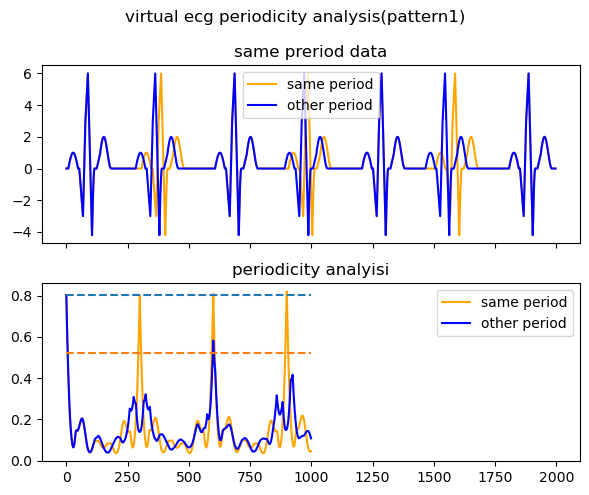

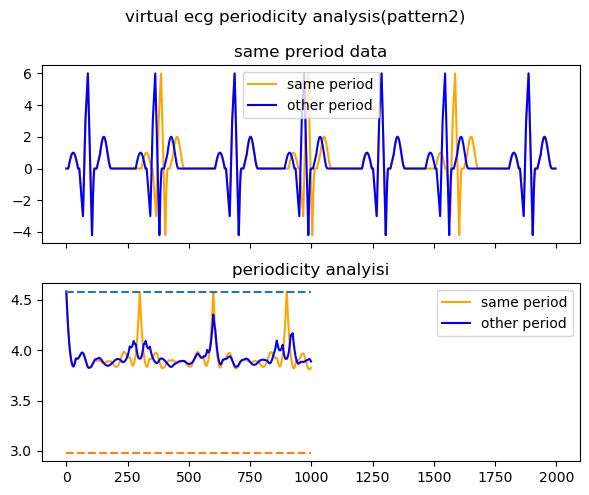

In [3]:
from bedcmm.pattern.cy_impl import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

ecg_same_preiod = np.array(pd.read_csv("./sample_data/ecg_same_preiod.csv"))[:,0]
ecg_other_preiod = np.array(pd.read_csv("./sample_data/ecg_other_preiod.csv"))[:,0]

# with negative periodicity analysis pattern 1
ecg_same_preiod_posi = ecg_same_preiod.copy()
ecg_same_preiod_posi[ecg_same_preiod_posi < 0] = 0
ecg_same_preiod_nega = ecg_same_preiod.copy()
ecg_same_preiod_nega[ecg_same_preiod_posi > 0] = 0
ecg_same_periodicyty_p1 = periodicity_1d(ecg_same_preiod_posi) + periodicity_1d(-ecg_same_preiod_nega)

ecg_other_preiod_posi = ecg_other_preiod.copy()
ecg_other_preiod_posi[ecg_other_preiod_posi < 0] = 0
ecg_other_preiod_nega = ecg_other_preiod.copy()
ecg_other_preiod_nega[ecg_other_preiod_posi > 0] = 0
ecg_other_periodicyty_p1 = periodicity_1d(ecg_other_preiod_posi) + periodicity_1d(-ecg_other_preiod_nega)

# with negative periodicity analysis pattern 2
ecg_same_preiod_no_nega = ecg_same_preiod - ecg_same_preiod.min()
ecg_same_periodicyty_p2 = periodicity_1d(ecg_same_preiod_no_nega)

ecg_other_preiod_no_nega = ecg_other_preiod - ecg_other_preiod.min()
ecg_other_periodicyty_p2 = periodicity_1d(ecg_other_preiod_no_nega)


mean_level_p1 = ecg_other_preiod_posi.mean() - ecg_other_preiod_nega.mean()
fig, ax = plt.subplots(2, 1, sharex="all", figsize=(6, 5),tight_layout=True)
fig.suptitle("virtual ecg periodicity analysis(pattern1)")
ax[0].set_title('same preriod data')
ax[0].plot(ecg_same_preiod,'orange')
ax[0].plot(ecg_other_preiod,'b')
ax[0].legend(['same period','other period'])
ax[1].set_title('periodicity analyisi')
ax[1].plot(ecg_same_periodicyty_p1,'orange')
ax[1].plot(ecg_other_periodicyty_p1,'b')
ax[1].plot([0,len(ecg_same_preiod)/2],[mean_level_p1,mean_level_p1],'--')
ax[1].plot([0,len(ecg_same_preiod)/2],[mean_level_p1*0.65,mean_level_p1*0.65],'--')
ax[1].legend(['same period','other period'])


mean_level_p2 = ecg_same_preiod_no_nega.mean()
fig, ax = plt.subplots(2, 1, sharex="all", figsize=(6, 5),tight_layout=True)
fig.suptitle("virtual ecg periodicity analysis(pattern2)")
ax[0].set_title('same preriod data')
ax[0].plot(ecg_same_preiod,'orange')
ax[0].plot(ecg_other_preiod,'b')
ax[0].legend(['same period','other period'])
ax[1].set_title('periodicity analyisi')
ax[1].plot(ecg_same_periodicyty_p2,'orange')
ax[1].plot(ecg_other_periodicyty_p2,'b')
ax[1].plot([0,len(ecg_same_preiod)/2],[mean_level_p2,mean_level_p2],'--')
ax[1].plot([0,len(ecg_same_preiod)/2],[mean_level_p2*0.65,mean_level_p2*0.65],'--')
ax[1].legend(['same period','other period'])



## Continuity analysis

Cython


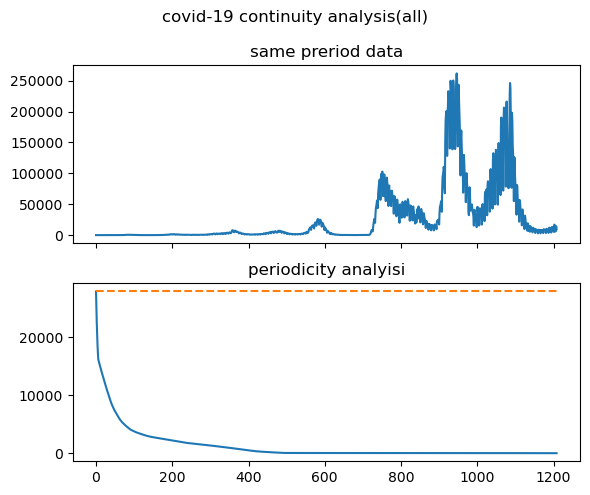

In [ ]:
from bedcmm.pattern import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

covid_19_data_df = pd.read_csv("./sample_data/covid-19/newly_confirmed_cases_daily.csv")[['Date','ALL']]
covid_19_data = np.array(covid_19_data_df['ALL'].values,dtype=np.float64)
covid_19_continu = continuity_1d(covid_19_data)

fig, ax = plt.subplots(2, 1, sharex="all", figsize=(6, 5),tight_layout=True)
fig.suptitle("covid-19 continuity analysis(all)")
ax[0].set_title('same preriod data')
ax[0].plot(covid_19_data)
ax[1].set_title('periodicity analyisi')
ax[1].plot(covid_19_continu)
ax[1].plot([0,len(covid_19_data)],[covid_19_data.mean(),covid_19_data.mean()],'--')
